## Floating-Point Arithmetic

This is the notebook of the paper [< What Every Computer Scientist Should Know About Floating-Point Arithmetic>](https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html#1374). I wrote the code here for better understanding of the Floating-point.

### Floating-point Formats

In general, a floating-point number will be represented as $\pm \ d_0.d_1d_2\dots d_{p-1} \times \beta^e$, where $d_0.d_1d_2\dots d_{p-1}$ is called the significand and has p digits(precision) and $\beta$ is the base.
$$(d_0+d_1\beta^{-1}+\dots+d_{p-1}\beta^{-(p-1)})\beta^e, (0\le d_i<\beta)$$

When $\beta= 2, p = 3, e_{min} = -1$ and $e_{max} = 2$ there are 16 normalized floating-point numbers, as the chart shown below:

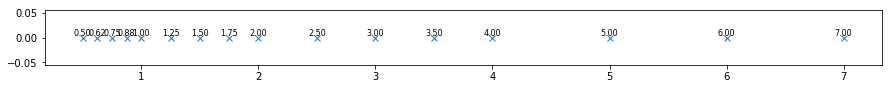

In [63]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,1))
beta = 2.0
#p = 3
e_min = -1
e_max = 2
d0 = 1
d = {}
a = []
i = 0
for d1 in [0, 1]:
    for d2 in [0, 1]:
        for e in range(e_min, e_max+1):
            num = (d0 + d1*np.power(beta, -1) + d2*np.power(beta, -2))*np.power(beta, e)
            d[i] = num
            a.append(num)
            i += 1
            
y = np.zeros(len(a))
plt.plot(a, np.zeros_like(a) + 0., 'x')
for _x, _y in zip(a, y):
    plt.text(_x, _y, '%.2f' % _x, ha='center', va='bottom', size=8)
#plt.plot(a, y, 'ro')

#多行注释：ctrl+/
#隐藏y轴
#frame = plt.gca()
#frame.axes.get_yaxis().set_visible(False)
plt.show()

In [64]:
3.12 * 0.01

0.031200000000000002

In [65]:
x = 1.0
p = 0

while x != x + 1:
    x *= 2
    p += 1

print('x = ', x)
print('double-precision floating-point format uses a {}-bit significand.'.format(p))

x =  9007199254740992.0
double-precision floating-point format uses a 53-bit significand.


### Relative Error and Ulps

Squeezing infinitely many real numbers into a finite number of bits requires an approximate representation. Therefore the result of a floating-point calculation must often be rounded in order to fit back into its finite representation.

Since rounding error is inherent in floating-point computation, it is important to measure it with Relative Error and Ulps.

<b><em>Ulps</em></b> stands for "units in the last place". Consider the floating-point format with $\beta=10, p=3$. If the floating-point number $d.d\dots d \times \beta^e$ is used to represent $z$, then it is in error by $|d.d\dots d - (z/\beta^e)|\beta^{p-1}$ units in the last place.
$$Example\ 1:\ \ if\ the\ real\ number\ 0.0314159\ is\ represented\ as\ 3.14\times 10^{-2}$$
$$then\ it\ is\ in\ error\ by\ .159 ulps$$

<b><em>Relative Error</em></b> is the difference between floating-point format number and real number divided by the real number. The relative error that corresponds to 0.5ulp: $\frac {1}{2} \beta^{-p} \le \frac {1}{2}ulp \le \frac {\beta}{2} \beta^{-p}$.

The upper bound $\frac {\beta}{2} \beta^{-p}$ is called ***machine epsilon*** $\epsilon$. The machine epsilon of Example 1 is $\epsilon = 5\times 10^{-3} = 0.005$ and the relative error would be expressed as $(.00159/3.14159)/.005)\epsilon \approx 0.1\epsilon$.

The most natual way to measure rounding error is in ulps. The Relatice Error is not sensitive to the quantity of the number, which means larger number may have lager error in ulps but the Relative Error might be the same.  However, when analyzing the rounding error caused by various formulas, relative error is a better measure.

When a floating-point number is in error by N ulps, that means the number of contaminated digits is $log_{\beta} N$. If the relative error in a computation is $N\epsilon$, then contaminated digits $\approx log_{\beta}N$.

##### **Theorem 1**: Using a floating-point format with parameter $\beta$ and $p$, and computing differences using $p$ digits, the relative error of the result can be as large as $\beta - 1$.

##### **Theorem 2**: If $x$ and $y$ are floating-point numbers in a format with parameter $\beta$ and $p$, and if subtraction is done with $p+1$ digits(i.e. one guard digit), then the _relative rounding error_ in the result is less then $2\epsilon$.

### Cancellation

When subtracting nearby quantities, the most of significant digits in the oerands may match and cancel each other.

_Catastrophic cancellation_: e.g. subtraction of rounded number

_Benign cancellation_: e.g. subtraction of exactly known quantities($x$ and $y$ have no rounding error, $x-y$ has small relative error less then $2\epsilon$)

***To eliminate the catastrophic cancellation, avoid subtracting very close numbers.***

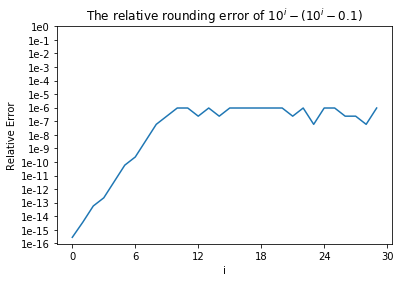

In [95]:
#The relative rounding error of (1ei - (1ei - 0.1))

Rounding_error = np.array([])

for i in range(0, 30):
    Rounding_error = np.append(Rounding_error, 
                               np.abs(np.power(10, i) 
                                - (np.power(10, i) - 0.1) - 0.1)/0.1)
    
#print(Rounding_error)
x = np.array([np.power(10.0, i) for i in range(0, 30)])
plt.plot(np.log10(x), np.log10(Rounding_error))
plt.xticks(np.linspace(0,30,6), [r'{}'.format(i) for i in range(0, 31, 6)])
plt.yticks(np.linspace(-16,0,17), [r'1e{}'.format(i) for i in range(-16, 4)])
plt.title("The relative rounding error of $10^i - (10^i - 0.1)$")
plt.xlabel("i")
plt.ylabel("Relative Error")

plt.show()